In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import re
import nltk
from nltk.corpus import stopwords
import string
import json
from time import time
import pickle
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers import add
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Tải mô hình đã huấn luyện
model_lstm = load_model('/content/drive/MyDrive/Colab_Notebooks/deep_learning/ImageCaptionv2/image_captioning_model.keras')

# Load từ điển từ/idx và idx/to từ
with open('/content/drive/MyDrive/Colab_Notebooks/deep_learning/ImageCaptionv2/word_to_idx.json', 'r') as f:
    word_to_idx = json.load(f)

with open('/content/drive/MyDrive/Colab_Notebooks/deep_learning/ImageCaptionv2/idx_to_word.json', 'r') as f:
    idx_to_word = json.load(f)

# Chuẩn bị mô hình CNN với InceptionV3
model_cnn = InceptionV3(weights='imagenet')
model_cnn = Model(model_cnn.input, model_cnn.layers[-2].output)

# Đặt các thông số cần thiết
max_len = 49

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Hàm tiền xử lý ảnh
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(299,299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def encode_image(img_path):
    img = preprocess_image(img_path)
    feature_vector = model_cnn.predict(img, verbose=0)
    feature_vector = feature_vector.reshape(feature_vector.shape[1],)
    return feature_vector

In [ ]:
def predict_caption(photo):
    in_text = 'startseq'
    for _ in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
        yhat = model_lstm.predict([photo, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word.get(str(yhat))
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

2048


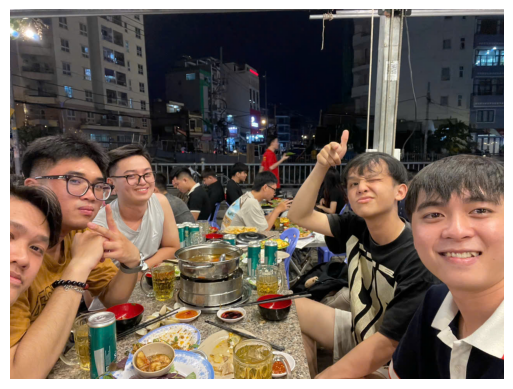

group of people sitting around table with food


In [ ]:
encoding_test_indiv = {}

img = '/content/drive/MyDrive/Colab_Notebooks/deep_learning/IC/ma_men.jpg'#.format(test[ix])

encoding_test_indiv[0] = encode_image(img)


print(len(encoding_test_indiv[0]))
photo = encoding_test_indiv[0].reshape((1,2048))

i = plt.imread(img)
plt.imshow(i)
plt.axis("off")
plt.show()

caption = predict_caption(photo)
print(caption)

2048


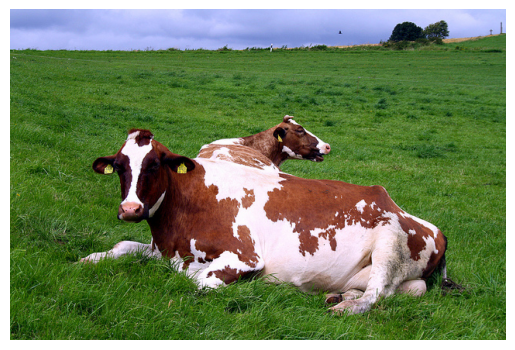

two cows are standing in field with mountains in the background


In [ ]:
encoding_test_indiv = {}

img = '/content/drive/MyDrive/Colab_Notebooks/deep_learning/IC/000000000019.jpg'#.format(test[ix])

encoding_test_indiv[0] = encode_image(img)


print(len(encoding_test_indiv[0]))
photo = encoding_test_indiv[0].reshape((1,2048))

i = plt.imread(img)
plt.imshow(i)
plt.axis("off")
plt.show()

caption = predict_caption(photo)
print(caption)

2048


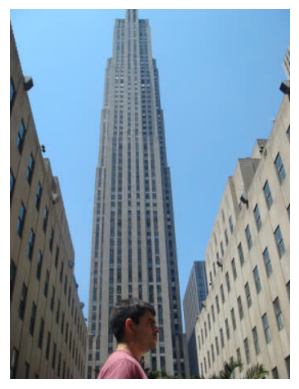

man flying through the air while holding kite


In [ ]:
encoding_test_indiv = {}

img = '/content/drive/MyDrive/Colab_Notebooks/deep_learning/IC/z6549984974470_4446f9beec55cd766100893c0b43c4e6.jpg'#.format(test[ix])

encoding_test_indiv[0] = encode_image(img)


print(len(encoding_test_indiv[0]))
photo = encoding_test_indiv[0].reshape((1,2048))

i = plt.imread(img)
plt.imshow(i)
plt.axis("off")
plt.show()

caption = predict_caption(photo)
print(caption)

2048


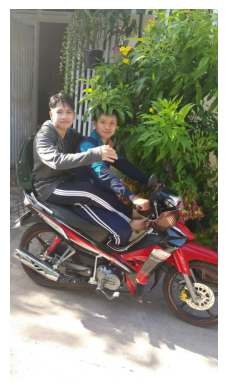

man riding motorcycle down street


In [ ]:
encoding_test_indiv = {}

img = '/content/drive/MyDrive/Colab_Notebooks/deep_learning/IC/z6560391931404_1a522099f9ed9de21cb905daeb16df18.jpg'#.format(test[ix])

encoding_test_indiv[0] = encode_image(img)


print(len(encoding_test_indiv[0]))
photo = encoding_test_indiv[0].reshape((1,2048))

i = plt.imread(img)
plt.imshow(i)
plt.axis("off")
plt.show()

caption = predict_caption(photo)
print(caption)

2048


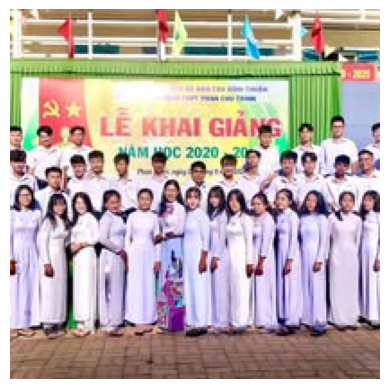

group of people standing next to each other


In [ ]:
encoding_test_indiv = {}

img = '/content/drive/MyDrive/Colab_Notebooks/deep_learning/IC/118906390_1042484476211116_5158169388394874507_n.jpg'#.format(test[ix])

encoding_test_indiv[0] = encode_image(img)


print(len(encoding_test_indiv[0]))
photo = encoding_test_indiv[0].reshape((1,2048))

i = plt.imread(img)
plt.imshow(i)
plt.axis("off")
plt.show()

caption = predict_caption(photo)
print(caption)

2048


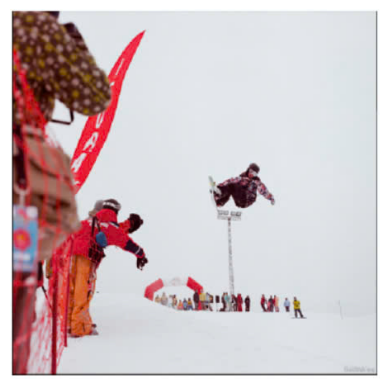

group of people flying kites in the sky


In [ ]:
encoding_test_indiv = {}

img = '/content/drive/MyDrive/Colab_Notebooks/deep_learning/IC/manjumpinginthesnow.jpg'#.format(test[ix])

encoding_test_indiv[0] = encode_image(img)


print(len(encoding_test_indiv[0]))
photo = encoding_test_indiv[0].reshape((1,2048))

i = plt.imread(img)
plt.imshow(i)
plt.axis("off")
plt.show()

caption = predict_caption(photo)
print(caption)